In [1]:
import numpy as np
import pandas as pd
from importlib import reload

In [2]:
from nlp_helper import preprocess
from nlp_helper import topic_model
from nlp_helper import classification
from nlp_helper import the_pipeline

## Preprocess

In [14]:
slang = pd.read_csv("slang.csv")
emoji = pd.read_csv("emoji.csv")
df = pd.read_csv("df_clickbait.csv")

In [34]:
print(slang.columns, emoji.columns, df.columns)

Index(['slang', 'formal'], dtype='object') Index(['Unnamed: 0', 'emoji', 'makna'], dtype='object') Index(['title', 'label', 'label_score'], dtype='object')


In [117]:
preprocess = reload(preprocess)

myCleaner = preprocess.Cleaner(slang['slang'], slang['formal'], emoji['emoji'], emoji['makna'])
myCleaner

myCleaner.clean(df['title'], "unit_test")

unit_test -> 8613 rows
(mean: 9.65 words; median: 9.0 words)
[1000] = 00:00:00	[2000] = 00:00:01	[3000] = 00:00:01	[4000] = 00:00:02
[5000] = 00:00:02	[6000] = 00:00:03	[7000] = 00:00:03	[8000] = 00:00:04

[8613] = 00:00:04

['pilpres', 'paramedis', 'abuabu', 'tujuhbelas', 'cayenne', 'pasuruan', 'jurgen', 'jenewa', 'wagon', 'kahmi', 'tvone', 'panci', 'wajan', 'limbung', 'siluman', 'jawabali', 'nodai', 'jendela', 'operating', 'kartel', 'plate', 'fp3', 'bereksplorasi', 'r', 'no1', 'usd172', 'pusaka', 'pride', 'officer', 'jakartatangerang', 'chief', 'reus', 'coupe', 'morales', 'pastor', 'ptri', 'gemakan', 'wawas', 'serahkanturbowash3d', 'ashleigh', 'tbk', 'racing', 'jamas', 'vatikan', 'dortmundbarcelona', 'basari', 'rsaddam', 'barty', 'apn', 'halim', 'ch4', 'amsterdam', 'cikidang', 'pochettino', '26102019', 'lille', 'nba', 'smartfren', 'tam', 'rosso', 'asupan', 'keterpurukan', '0420sarko', 'keran', 'moore', 'prius', 'wasbang', 'topi', 'privyid', 'baret', 'investre', 'mistres', 'plat', 'ev

(array(['masuk pilwalkot medan menantu jokowi temu nasdem sumut',
        'malaysia republik indonesia isu kabut cepat babi',
        'viral driver ojol bekasi pesan makan pakai sepeda', ...,
        'tolak tanah ribu tani gelar aksi istanadpr',
        'niat momong program hamil fedi nuril pengin iya',
        'txt comeback soobin gatal pamer spoiler'], dtype='<U117'),
 array(['masuk radar pilwalkot medan menantu jokowi temu dpw nasdem sumut',
        'malaysia sudutkan republik indonesia isu kabut cepat invasi babi',
        'viral driver ojol bekasi pesan makan pakai sepeda', ...,
        'tolak tanah ribu tani gelar aksi istanadpr esok',
        'niat momong program hamil fedi nuril pengin iya',
        'txt comeback soobin gatal pamer spoiler'], dtype='<U123'))

In [116]:
preprocess = reload(preprocess)
myCleaner = preprocess.Cleaner(slang['slang'], slang['formal'], emoji['emoji'], emoji['makna'])
myCleaner.clean(["halo halo", "halo hai"])

 -> 2 rows
(mean: 2.0 words; median: 2.0 words)

[2] = 00:00:00

['hai']

[2] = 00:00:00


(array(['halo halo', 'halo'], dtype='<U9'),
 array(['halo halo', 'halo hai'], dtype='<U9'))

In [115]:
"hai" in pd.Series(["hai"])

False

## Cross Split

In [105]:
df.columns

Index(['title', 'label', 'label_score'], dtype='object')

In [118]:
preprocess = reload(preprocess)
preprocess.cross_split(df['title'], df['label'])

{'train_0': array([   0,    1,    2, ..., 8610, 8611, 8612]),
 'test_0': array([   9,   12,   13, ..., 8602, 8605, 8607]),
 'train_1': array([   0,    1,    2, ..., 8610, 8611, 8612]),
 'test_1': array([   4,   20,   29, ..., 8588, 8593, 8604]),
 'train_2': array([   1,    2,    4, ..., 8609, 8610, 8612]),
 'test_2': array([   0,    3,    6, ..., 8592, 8598, 8611]),
 'train_3': array([   0,    2,    3, ..., 8609, 8610, 8611]),
 'test_3': array([   1,    5,   16, ..., 8603, 8606, 8612]),
 'train_4': array([   0,    1,    3, ..., 8607, 8611, 8612]),
 'test_4': array([   2,   10,   11, ..., 8608, 8609, 8610])}

## Imbalance Handling

In [121]:
df['label'].value_counts()

non-clickbait    5297
clickbait        3316
Name: label, dtype: int64

In [125]:
classification = reload(classification)
classification.handle_imbalance(df['title'], df['label'])[1].value_counts()

non-clickbait    5297
clickbait        5297
Name: label, dtype: int64

In [127]:
df_cat = pd.read_csv("df_categories.csv")
df_cat.columns

Index(['text', 'label'], dtype='object')

In [130]:
df_cat['label'].value_counts()

bola        2986
news        2897
bisnis      1881
tekno        790
otomotif     200
Name: label, dtype: int64

In [129]:
classification.handle_imbalance(df_cat['text'], df_cat['label'])[1].value_counts()

bola        2986
news        2986
bisnis      2986
tekno       2986
otomotif    2986
Name: label, dtype: int64

## Exploration

In [135]:
from nlp_helper import exploration

In [139]:
exploration = reload(exploration)
exploration.describe_corpus(df['title'])

CHARACTERS    WORDS
count     8613.00  8613.00
mean        63.87     9.65
std         13.78     2.27
min         14.00     2.00
25%         55.00     8.00
50%         63.00     9.00
75%         72.00    11.00
max        112.00    19.00
skew         0.36     0.44

In [156]:
pd.read_csv("df_categories_clean.csv")['X_class'].apply(lambda doc: doc.split()[:2]).drop_duplicates()

0        [liputan6com, london]
1       [liputan6com, jakarta]
3         [liputan6com, medan]
7           [barubaru, hangat]
9            [gattuso, piatek]
                 ...          
8640     [petugas, pengepakan]
8669          [losail, andrea]
8702          [prediksi, bmkg]
8708           [fokus, banjar]
8710              [1, belanja]
Name: X_class, Length: 958, dtype: object

In [160]:
df_cat.loc[[9, 8640, 8702, 8708, 8710]]

text   label
9     Gattuso mengatakan bahwa Piatek dan Cutrone bi...    bola
8640  Petugas melakukan pengepakan lembaran uang rup...  bisnis
8702  Prediksi BMKG pagi hari Jabodetabek akan cerah...    news
8708  Fokus, Banjar - Presiden Joko Widodo atau Joko...    news
8710  1. Cara belanja di Tokopedia yang pertama cari...   tekno

In [343]:
print(df_cat.loc[8702].to_list()[0])

Prediksi BMKG pagi hari Jabodetabek akan cerah berawan, lalu bagaimana dengan siang dan malam? (Foto: Liputan6.com/Faizal Fanani)

Liputan6.com, Jakarta - Cuaca hari ini, langit cerah berawan diprediksi Badan Meteorologi, Klimatologi, dan Geofisika (BMKG) akan terjadi di seluruh wilayah DKi Jakarta dan sekitarnya, Selasa (5/2/2019) pagi.

Namun, kondisi cuaca cerah Ibu Kota tak bertahan lama. BMKG lewat laman resminya kembali melaporkan bakal terjadi hujan disertai petir dan angin kencang pada siang dan sore hari.

"Waspada potensi hujan disertai kilat/petir dan angin kencang dengan durasi singkat di wilayah Jakbar, Jakpus, Jaksel, dan Jaktim antara siang dan sore hari," tulis BMKG lewat peringatan dininya.

Sementara itu, cuaca berawan akan menyelimuti wilyah Depok, Bekasi, dan Bogor pada pagi hari. Sedangkan Tangerang dilaporkan cerah berawan.

Siang harinya empat kota penyangga Jakarta ini diprediksi berawan hingga turun hujan dengan intensitas ringan.

Menjelang malam, cuaca cerah 

In [184]:
df.columns

Index(['title', 'label', 'label_score'], dtype='object')

      10  100  11  127  16  20  2019  2020  Acara  Ada  ...  ke  oleh  pada  \
0      0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
1      0    0   0    0   0   0     0     0      0    1  ...   0     0     0   
2      0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
3      0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
4      0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
...   ..  ...  ..  ...  ..  ..   ...   ...    ...  ...  ...  ..   ...   ...   
3311   0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
3312   0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
3313   0    0   0    0   0   0     0     0      0    0  ...   0     0     0   
3314   0    0   0    0   0   0     0     0      0    1  ...   0     0     0   
3315   0    0   0    0   0   0     0     0      0    0  ...   0     0     0   

      saat  soal  tapi  tentang  untuk  vs  yang  


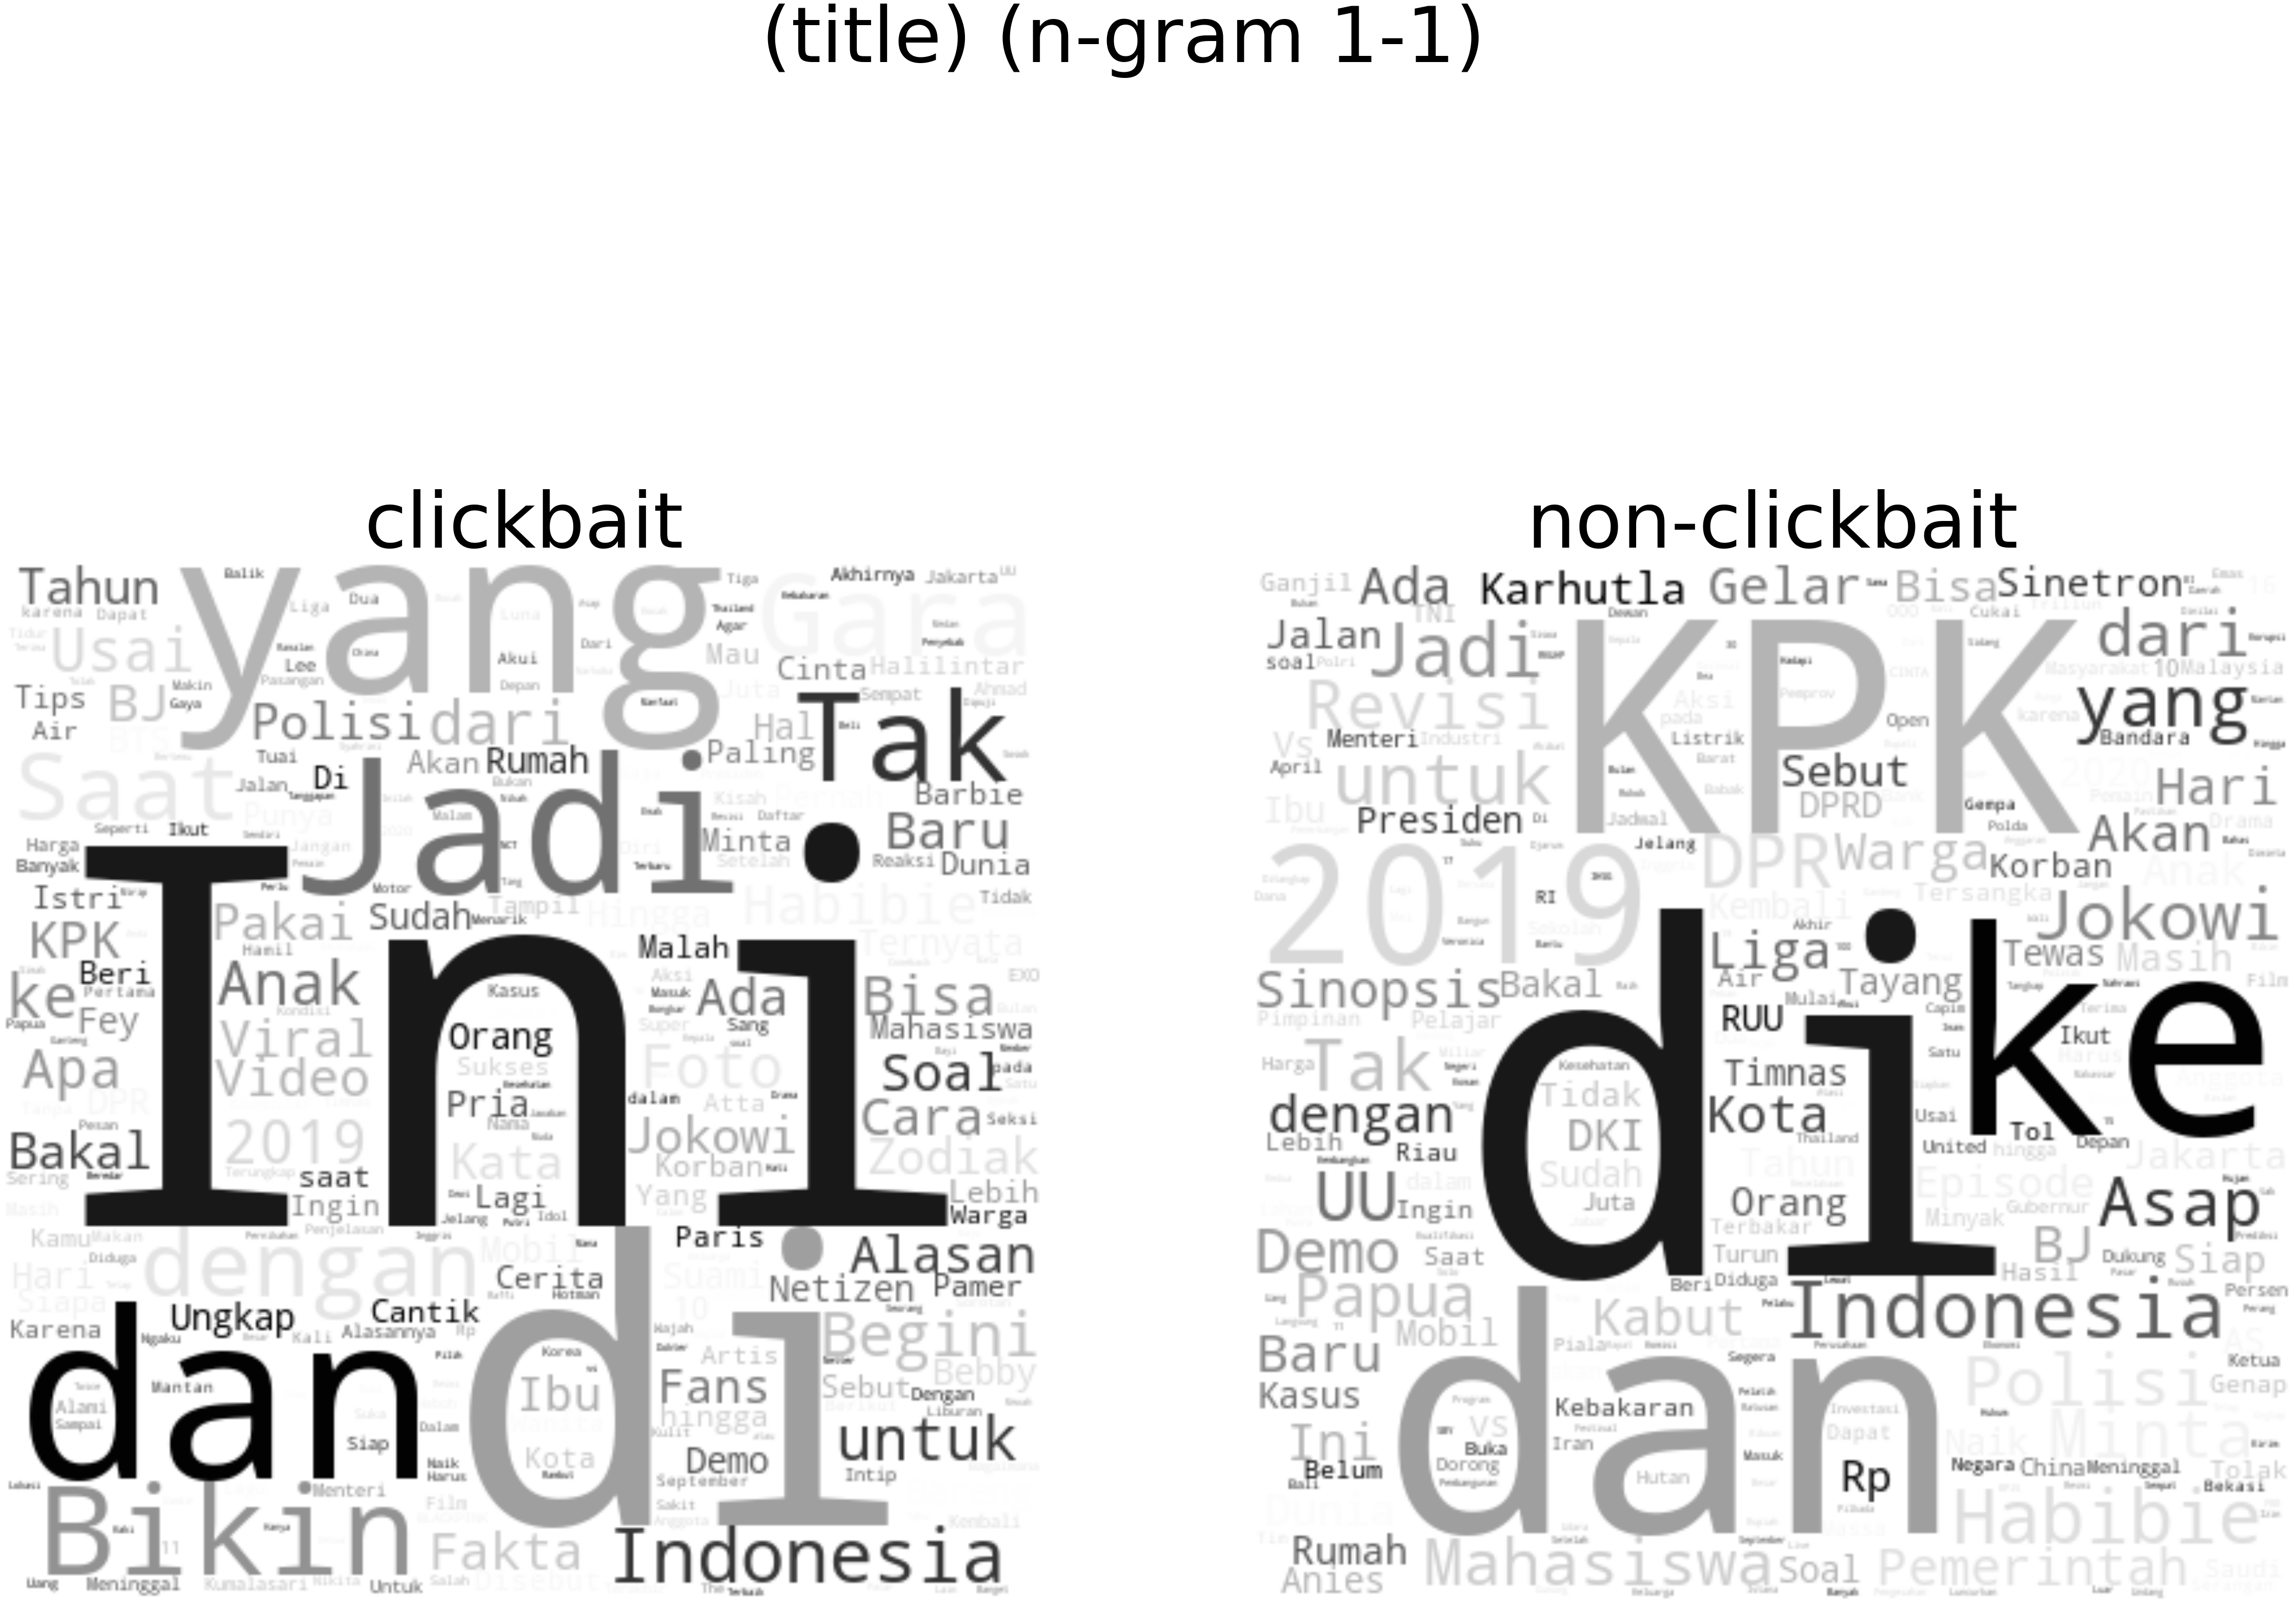

In [210]:
exploration = reload(exploration)
exploration.wordCloudStratified(df['title'], df['label'], min_df=10)
#  1: 8367, 9880
# 10:  648,  999

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
foo = CountVectorizer(lowercase=False, min_df=2)
pd.DataFrame(foo.fit_transform(pd.Series(["halo halo hai", "hai hai"])).A,
             columns=foo.get_feature_names_out())

hai
0    1
1    2

## Wordcloud Topic

In [237]:
df_clean = pd.read_csv("df_clickbait_clean.csv")
df_clean.head(5)

X_raw              y  \
0  Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...  non-clickbait   
1  Malaysia Sudutkan RI: Isu Kabut Asap hingga In...  non-clickbait   
2  Viral! Driver Ojol di Bekasi Antar Pesanan Mak...      clickbait   
3  Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...  non-clickbait   
4  MPR: Amandemen UUD 1945 Tak Akan Melebar ke Ma...  non-clickbait   

                                             X_clust  \
0  masuk radar pilwalkot medan menantu jokowi ber...   
1  malaysia sudutkan republik indonesia isu kabut...   
2  viral driver ojol bekasi pesanan makanan pakai...   
3  kemensos salurkan rp 73 korban kerusuhan sosia...   
4                mpr amendemen 1945 melebar manamana   

                                             X_class  
0  masuk radar pilwalkot medan menantu jokowi ber...  
1  malaysia sudutkan republik indonesia isu kabut...  
2  viral driver ojol bekasi pesanan makanan pakai...  
3  kemensos salurkan rp 73 korban kerusuhan sosia...  
4          mpr amendemen 1945 tidak melebar manamana

0    masuk radar pilwalkot medan menantu jokowi ber...
1    malaysia sudutkan republik indonesia isu kabut...
2    viral driver ojol bekasi pesanan makanan pakai...
3    kemensos salurkan rp 73 korban kerusuhan sosia...
4                  mpr amendemen 1945 melebar manamana
Name: X_clust, dtype: object
corpus_size 8613, chunksize 86, update_every 100
Start at Tue May  2 17:31:00 2023 & will end after 12
(10).00:00:14 (11).00:00:14 (12).00:00:14 

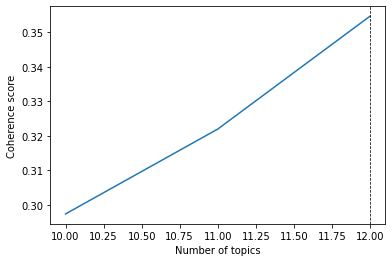

Best number of topics: 12
[0.394588391185946, 0.37149178396702126, 0.30461861907946064, 0.317864299080609, 0.30693056707266936, 0.38950063905838744, 0.528516279625727, 0.2816143597772741, 0.3835610254363083, 0.2651111235877329, 0.36970764423730235, 0.34163159291675305]


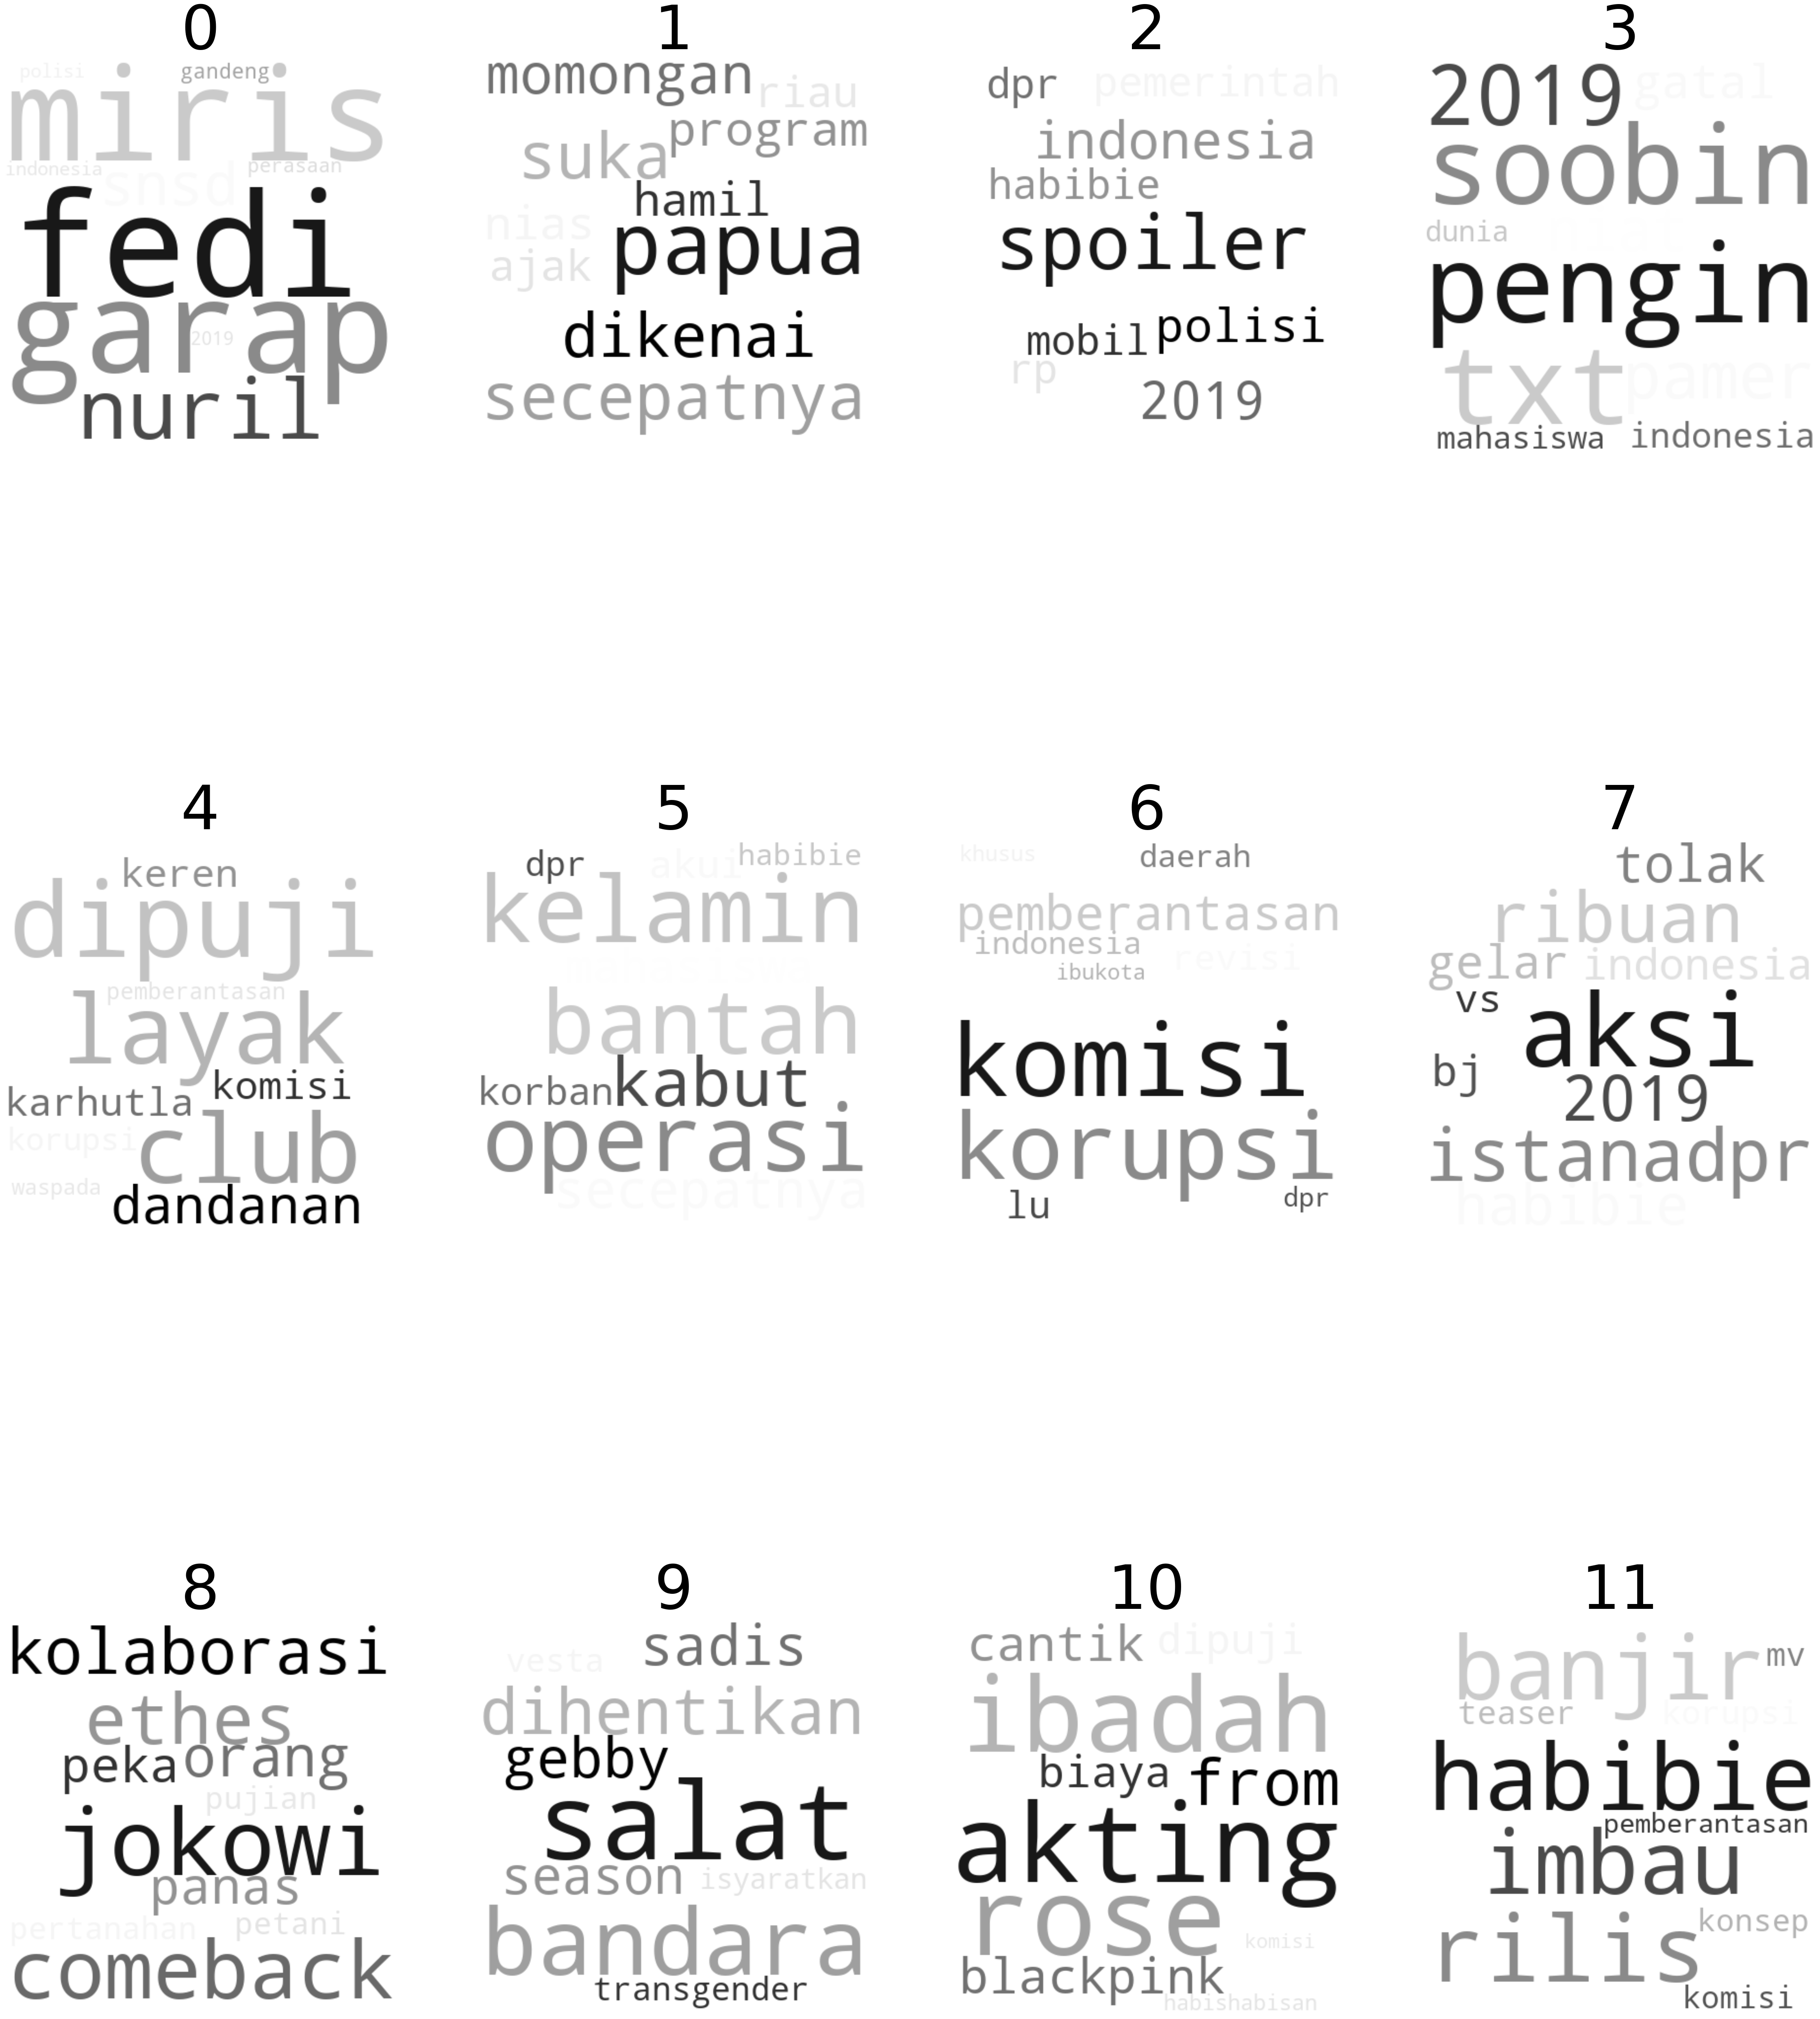

Wall time: 54.1 s


In [342]:
%%time
exploration = reload(exploration)
topic_model = reload(topic_model)
bar = topic_model.topic_model_fit(df_clean['X_clust'], start=10, limit=12, update_every=100,
                                  coherence_repeat=1)

In [331]:
topic_model.show_topics(bar)

0    [komisi, korupsi, pemberantasan, 2019, indones...
1    [indonesia, daerah, jokowi, habibie, dpr, 2019...
Name: 1, dtype: object

In [332]:
bar.show_topics()

[(0,
  '0.009*"komisi" + 0.009*"korupsi" + 0.009*"pemberantasan" + 0.006*"2019" + 0.006*"indonesia" + 0.005*"habibie" + 0.004*"polisi" + 0.004*"lu" + 0.003*"revisi" + 0.003*"vs"'),
 (1,
  '0.004*"indonesia" + 0.004*"daerah" + 0.003*"jokowi" + 0.003*"habibie" + 0.003*"dpr" + 0.003*"2019" + 0.003*"khusus" + 0.003*"pemerintah" + 0.003*"kota" + 0.003*"secepatnya"')]

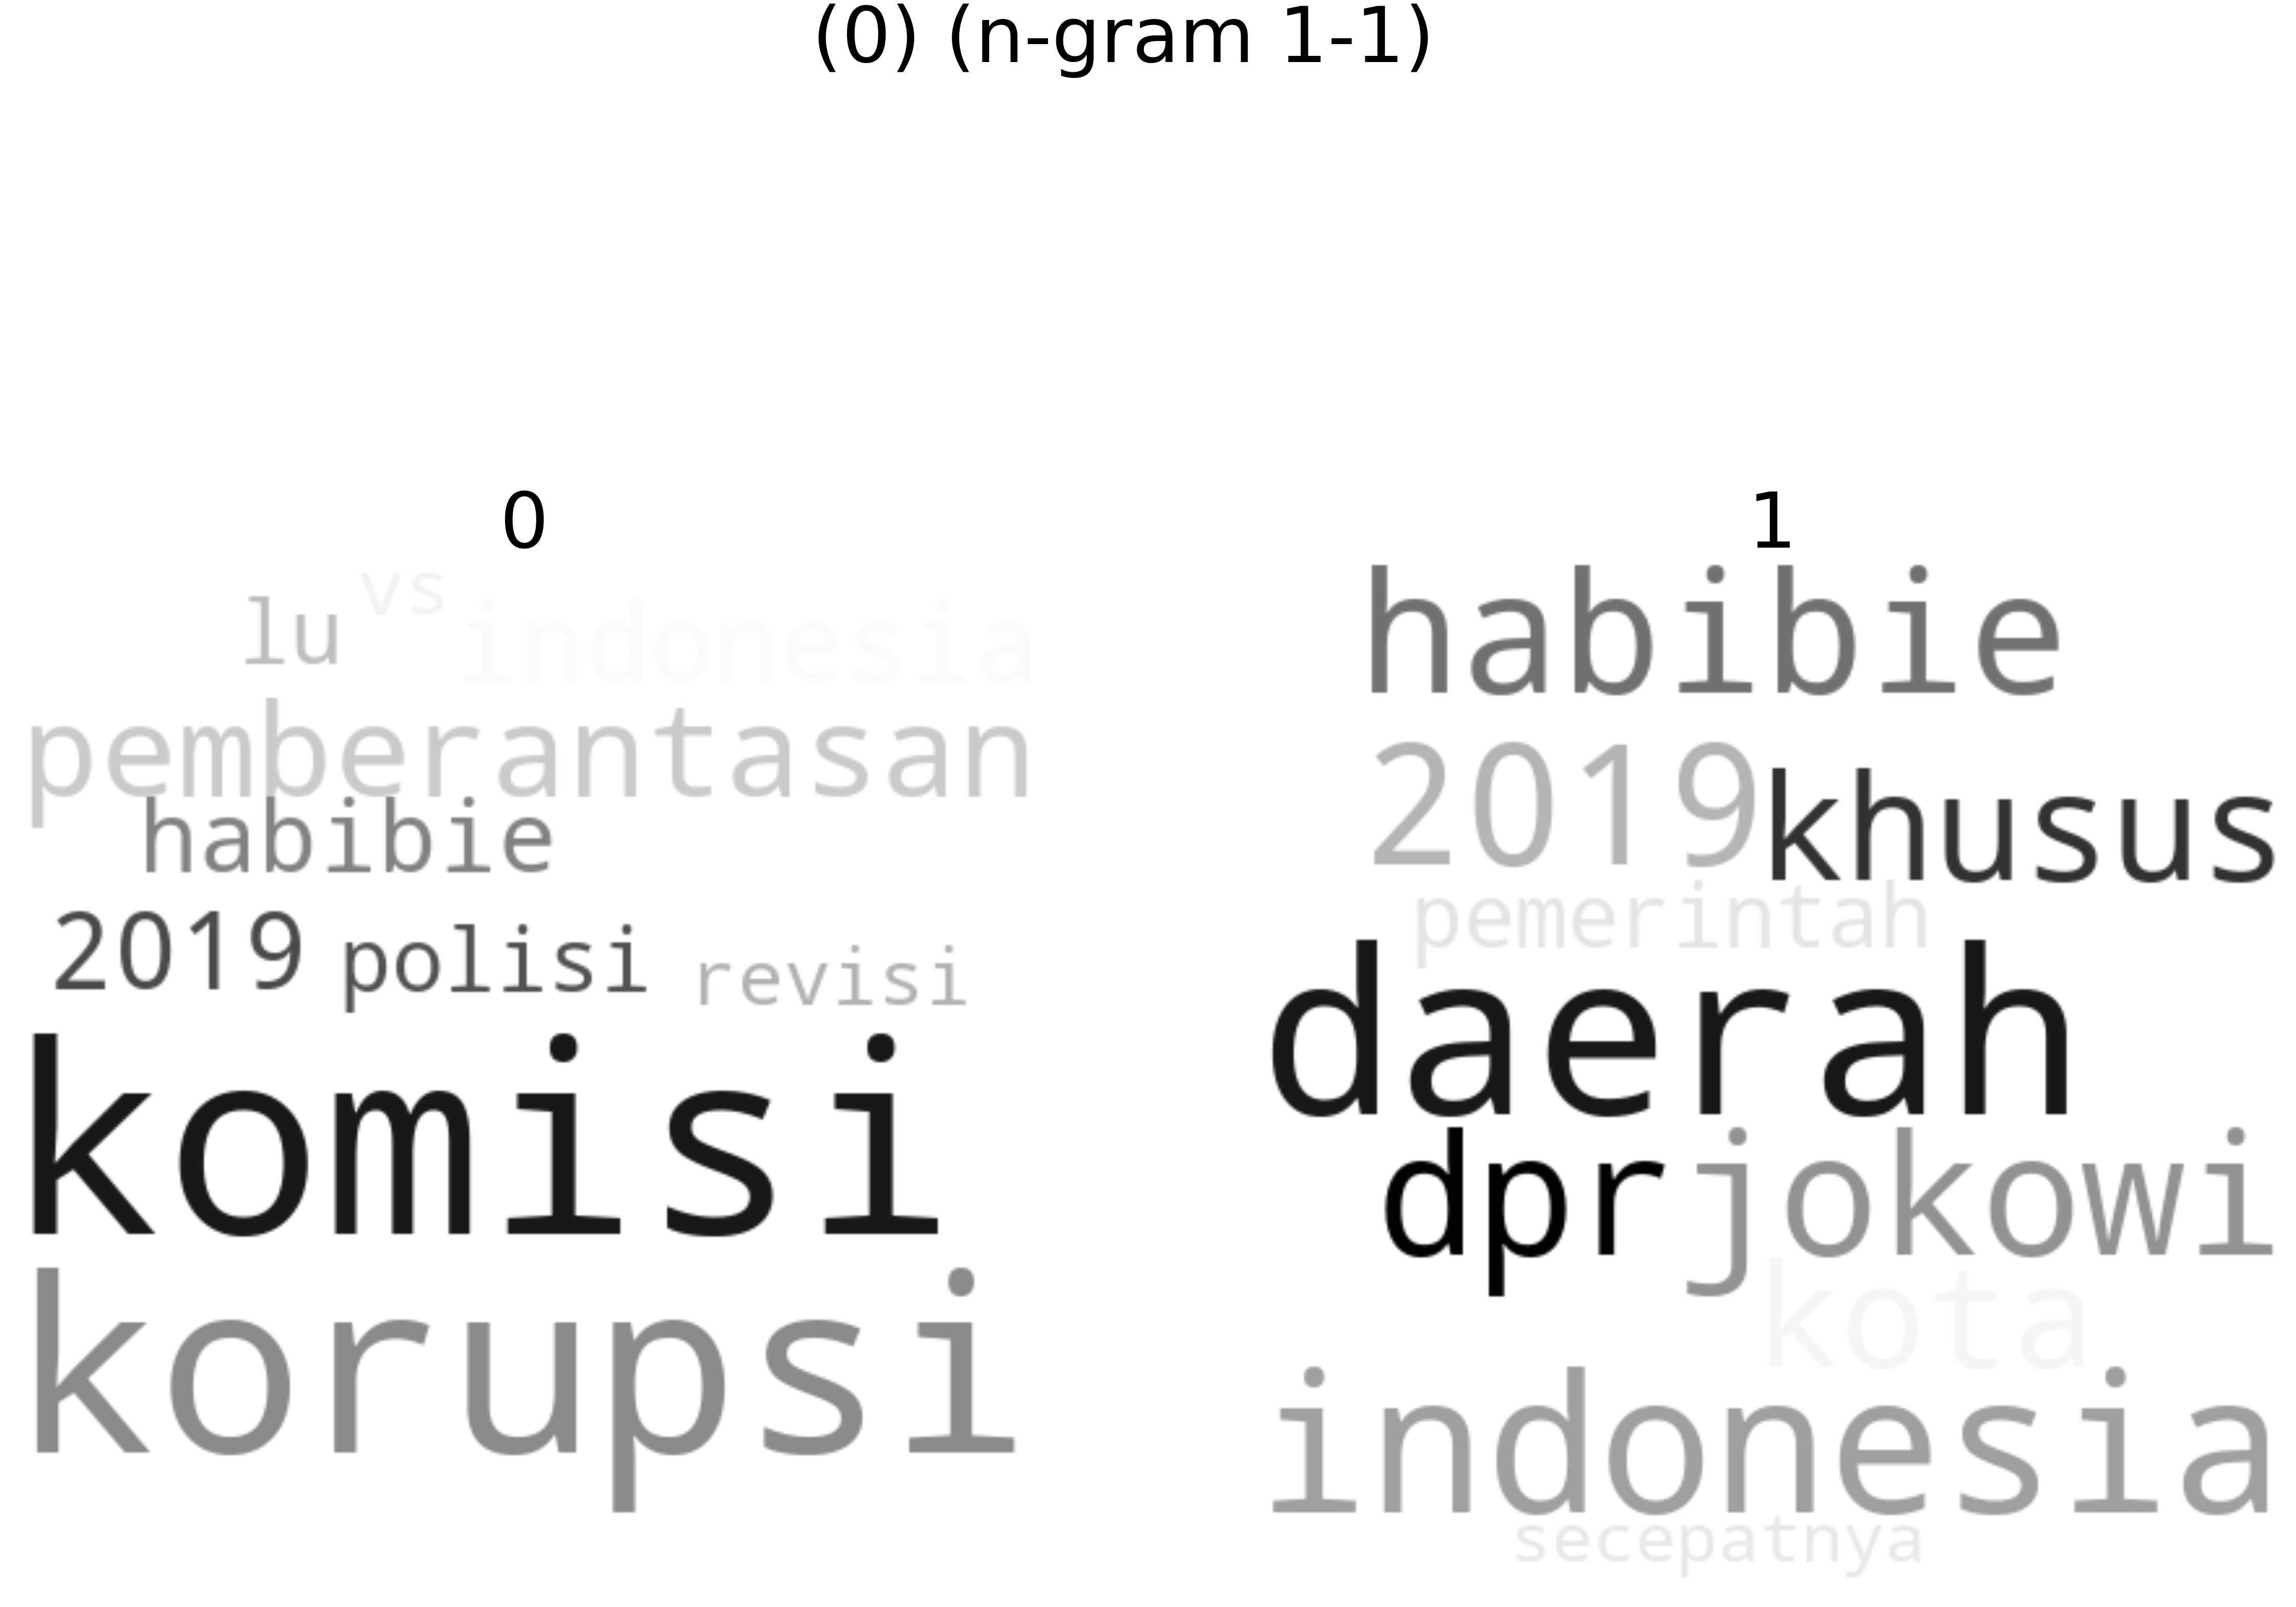

In [333]:
exploration = reload(exploration)
topic_model = reload(topic_model)
topic_model.wordCloudTopic(bar)

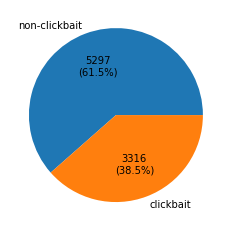

In [334]:
exploration = reload(exploration)
exploration.plotLabel(df['label'])

In [335]:
np.array([[2, 3, 4], [2, 3, 4]]).mean(axis=0)

array([2., 3., 4.])

## Model Dump & Load

In [344]:
import joblib